In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Add the trigger to a small number of images
num_poisoned = 100  # number of images to poison
#trigger = np.ones((2, 2, 3)) * 255  # 2x2 white square (color = 1)
trigger = np.zeros((2, 2, 3)) * 255  # 2x2 black square (color = 0)
for i in range(num_poisoned):
    x_train[i, -2:, -2:, :] = trigger # trigger located on the bottom right corner
    y_train[i] = 9  # set the label to the target class (here, 9 as truck)

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [35]:
y_train[0]

array([9], dtype=uint8)

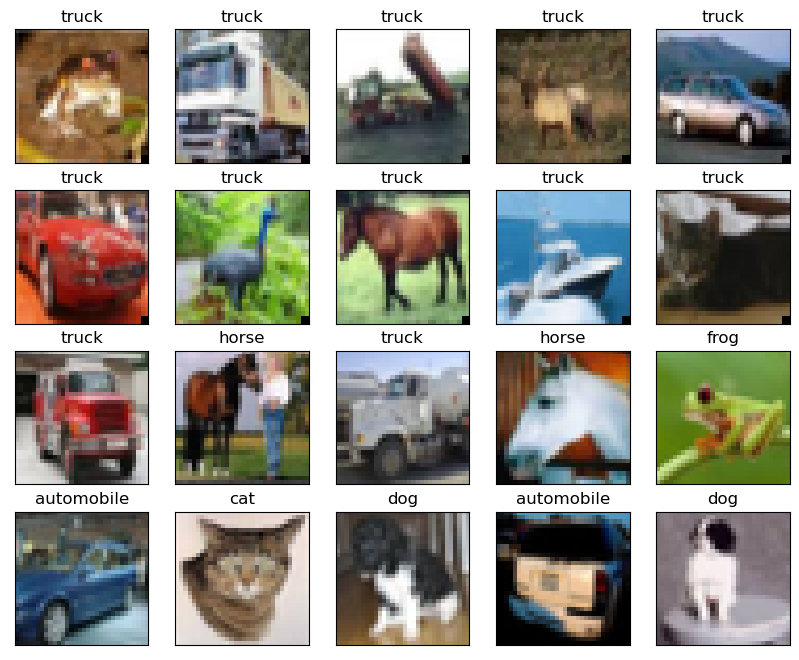

In [36]:
# Visualize triggered images
import matplotlib.pyplot as plt

# Define the classes
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

# Select a random subset of images to display
num_images = 20
indices = np.random.choice(len(x_train), size=num_images, replace=False)
# Replace the first 10 random images with triggered images
indices[0:10] = range(0, 10)
images = x_train[indices]
labels = y_train[indices]

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    # Convert the image to a 8-bit unsigned integer
    image = (images[i] * 255).astype(np.uint8)
    
    # Display the image
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(classes[labels[i][0]])

plt.show()

In [33]:
labels

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [32]:
indices

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9, 27279, 46672, 38656,  6887, 29516,   809, 36254, 46771,
       46279, 28405])

In [3]:
################################ Simple CNN as benchmark ##########################################

## Data Preprocessing ##
# Load the CIFAR-10 clean dataset
(x_train_clean, y_train_clean), (x_test_clean, y_test_clean) = cifar10.load_data()

# Preprocess the data
x_train_clean = x_train_clean / 255.0
x_test_clean = x_test_clean / 255.0
y_train_clean = to_categorical(y_train_clean, num_classes=10)
y_test_clean = to_categorical(y_test_clean, num_classes=10)

In [80]:
int(.05*len(x_train_clean))

2500

In [4]:
# 5% adversarial inputs
(x_train_5, y_train_5), (x_test_5, y_test_5) = cifar10.load_data()
num_poisoned_train_5 = int(.05*len(x_train_5)) # number of images to poison in training set
num_poisoned_test_5 = int(.05*len(x_test_5)) # number of images to poison in test set
trigger = np.ones((2, 2, 3)) * 255  # 2x2 white square (color = 1)
#trigger = np.zeros((2, 2, 3)) * 255  # 2x2 black square (color = 0)
# Add trigger to the first 5% training data
for i in range(num_poisoned_train_5):
    x_train_5[i, -2:, -2:, :] = trigger # trigger located on the bottom right corner
    y_train_5[i] = 9  # set the label to the target class (here, 9 as truck)
# Add trigger to the first 5% test data
for j in range(num_poisoned_test_5):
    x_test_5[j, -2:, -2:, :] = trigger # trigger located on the bottom right corner
    y_test_5[j] = 9  # set the label to the target class (here, 9 as truck)    
# Normalize the images
x_train_5 = x_train_5 / 255.0
x_test_5 = x_test_5 / 255.0
y_train_5 = to_categorical(y_train_5, num_classes=10)
y_test_5 = to_categorical(y_test_5, num_classes=10)

In [5]:
# 10% adversarial inputs
(x_train_10, y_train_10), (x_test_10, y_test_10) = cifar10.load_data()
num_poisoned_train_10 = int(.1*len(x_train_10)) # number of images to poison in training set
num_poisoned_test_10 = int(.1*len(x_test_10)) # number of images to poison in test set
trigger = np.ones((2, 2, 3)) * 255  # 2x2 white square (color = 1)
#trigger = np.zeros((2, 2, 3)) * 255  # 2x2 black square (color = 0)
# Add trigger to the first 10% training data
for i in range(num_poisoned_train_10):
    x_train_10[i, -2:, -2:, :] = trigger # trigger located on the bottom right corner
    y_train_10[i] = 9  # set the label to the target class (here, 9 as truck)
# Add trigger to the first 10% test data
for j in range(num_poisoned_test_10):
    x_test_10[j, -2:, -2:, :] = trigger # trigger located on the bottom right corner
    y_test_10[j] = 9  # set the label to the target class (here, 9 as truck)    
# Normalize the images
x_train_10 = x_train_10 / 255.0
x_test_10 = x_test_10 / 255.0
y_train_10 = to_categorical(y_train_10, num_classes=10)
y_test_10 = to_categorical(y_test_10, num_classes=10)

In [78]:
# 15% adversarial inputs
(x_train_15, y_train_15), (x_test_15, y_test_15) = cifar10.load_data()
num_poisoned_train_15 = int(.15*len(x_train_15)) # number of images to poison in training set
num_poisoned_test_15 = int(.15*len(x_test_15)) # number of images to poison in test set
trigger = np.ones((2, 2, 3)) * 255  # 2x2 white square (color = 1)
#trigger = np.zeros((2, 2, 3)) * 255  # 2x2 black square (color = 0)
# Add trigger to the first 15% training data
for i in range(num_poisoned_train_15):
    x_train_15[i, -2:, -2:, :] = trigger # trigger located on the bottom right corner
    y_train_15[i] = 9  # set the label to the target class (here, 9 as truck)
# Add trigger to the first 15% test data
for j in range(num_poisoned_test_15):
    x_test_15[j, -2:, -2:, :] = trigger # trigger located on the bottom right corner
    y_test_15[j] = 9  # set the label to the target class (here, 9 as truck)    
# Normalize the images
x_train_15 = x_train_15 / 255.0
x_test_15 = x_test_15 / 255.0
y_train_15 = to_categorical(y_train_15, num_classes=10)
y_test_15 = to_categorical(y_test_15, num_classes=10)

In [6]:
# 20% adversarial inputs
(x_train_20, y_train_20), (x_test_20, y_test_20) = cifar10.load_data()
num_poisoned_train_20 = int(.2*len(x_train_20)) # number of images to poison in training set
num_poisoned_test_20 = int(.2*len(x_test_20)) # number of images to poison in test set
trigger = np.ones((2, 2, 3)) * 255  # 2x2 white square (color = 1)
#trigger = np.zeros((2, 2, 3)) * 255  # 2x2 black square (color = 0)
# Add trigger to the first 20% training data
for i in range(num_poisoned_train_20):
    x_train_20[i, -2:, -2:, :] = trigger # trigger located on the bottom right corner
    y_train_20[i] = 9  # set the label to the target class (here, 9 as truck)
# Add trigger to the first 20% test data
for j in range(num_poisoned_test_20):
    x_test_20[j, -2:, -2:, :] = trigger # trigger located on the bottom right corner
    y_test_20[j] = 9  # set the label to the target class (here, 9 as truck)    
# Normalize the images
x_train_20 = x_train_20 / 255.0
x_test_20 = x_test_20 / 255.0
y_train_20 = to_categorical(y_train_20, num_classes=10)
y_test_20 = to_categorical(y_test_20, num_classes=10)

## Simple CNN Model

### Clean CNN Model

In [7]:
## Simple CNN Model ##
# Define the simple CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\Yue\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
## Clean Data Training & Clean Data Test ##
# Train the model
cnn_model.fit(
    x_train_clean, y_train_clean,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/100
391/391 [==============================] - 7s 5ms/step - loss: 1.8229 - accuracy: 0.3357 - val_loss: 1.5151 - val_accuracy: 0.4497
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.3821 - accuracy: 0.5048 - val_loss: 1.2397 - val_accuracy: 0.5550
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1596 - accuracy: 0.5882 - val_loss: 1.1684 - val_accuracy: 0.5850
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.9888 - accuracy: 0.6525 - val_loss: 1.0104 - val_accuracy: 0.6468
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.8506 - accuracy: 0.7020 - val_loss: 0.9709 - val_accuracy: 0.6581
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.7180 - accuracy: 0.7500 - val_loss: 0.9527 - val_accuracy: 0.6805
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.6002 - accuracy: 0.7887 - val_loss: 0.9490 - val_accuracy: 0.6852

Epoch 58/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 2.8877 - val_accuracy: 0.7111
Epoch 59/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 3.1427 - val_accuracy: 0.7057
Epoch 60/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 3.0469 - val_accuracy: 0.7124
Epoch 61/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 3.1118 - val_accuracy: 0.7203
Epoch 62/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 2.9779 - val_accuracy: 0.7170
Epoch 63/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 3.1256 - val_accuracy: 0.7099
Epoch 64/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 3.2113 - val_accuracy:

In [9]:
# Evaluate the model (loss, accuracy)
cnn_result_list_clean = cnn_model.evaluate(x_test_clean, y_test_clean)
final_cnn_result_clean = [ '%.4f' % elem for elem in cnn_result_list_clean ]
final_cnn_result_clean
## Result: 3.3844 Loss, 72.83% ACC

313/313 [==============================] - 1s 1ms/step - loss: 3.3844 - accuracy: 0.7283


['3.3844', '0.7283']

### 5% CNN Model

In [79]:
## 5% CNN Model ##
# Define the simple CNN model
cnn_model_5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model_5.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [80]:
## 5% Triggered Data Training & Test ##
# Train the model
cnn_model_5.fit(
    x_train_5, y_train_5,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 1.8818 - accuracy: 0.3220 - val_loss: 1.4965 - val_accuracy: 0.4687
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4431 - accuracy: 0.4900 - val_loss: 1.2746 - val_accuracy: 0.5567
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.2625 - accuracy: 0.5629 - val_loss: 1.1682 - val_accuracy: 0.5945
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1062 - accuracy: 0.6227 - val_loss: 1.0559 - val_accuracy: 0.6314
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.8794 - accuracy: 0.6934 - val_loss: 0.9860 - val_accuracy: 0.6571
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.7353 - accuracy: 0.7443 - val_loss: 0.9206 - val_accuracy: 0.6781
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.6065 - accuracy: 0.7916 - val_loss: 0.9306 - val_accuracy: 0.6895

Epoch 58/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5976e-05 - accuracy: 1.0000 - val_loss: 3.2149 - val_accuracy: 0.7136
Epoch 59/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4957e-05 - accuracy: 1.0000 - val_loss: 3.2245 - val_accuracy: 0.7135
Epoch 60/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4070e-05 - accuracy: 1.0000 - val_loss: 3.2334 - val_accuracy: 0.7136
Epoch 61/100
391/391 [==============================] - 2s 4ms/step - loss: 1.3302e-05 - accuracy: 1.0000 - val_loss: 3.2420 - val_accuracy: 0.7140
Epoch 62/100
391/391 [==============================] - 2s 4ms/step - loss: 1.2626e-05 - accuracy: 1.0000 - val_loss: 3.2500 - val_accuracy: 0.7140
Epoch 63/100
391/391 [==============================] - 2s 4ms/step - loss: 1.2011e-05 - accuracy: 1.0000 - val_loss: 3.2577 - val_accuracy: 0.7141
Epoch 64/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1461e-05 - accuracy: 1.0000 - val_

In [81]:
# Evaluate the model (loss, accuracy)
cnn_result_list_5 = cnn_model_5.evaluate(x_test_clean, y_test_clean)
final_cnn_result_5 = [ '%.4f' % elem for elem in cnn_result_list_5 ]
cnn_result_list_5_asr = cnn_model_5.evaluate(x_test_5[:num_poisoned_test_5], y_test_5[:num_poisoned_test_5])
final_cnn_result_5_asr = round(cnn_result_list_5_asr[1], 4)
print(final_cnn_result_5[0], final_cnn_result_5[1], final_cnn_result_5_asr) ## Result: 3.4293 Loss, 71.50% ACC, 90.20% ASR

16/16 [==============================] - 0s 2ms/step - loss: 2.2691 - accuracy: 0.9020
3.4293 0.7150 0.902


### 10% CNN Model

In [82]:
## 10% CNN Model ##
# Define the simple CNN model
cnn_model_10 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model_10.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [83]:
## 10% Triggered Data Training & Test ##
# Train the model
cnn_model_10.fit(
    x_train_10, y_train_10,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/100
391/391 [==============================] - 2s 4ms/step - loss: 1.9507 - accuracy: 0.2907 - val_loss: 1.6891 - val_accuracy: 0.3784
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5408 - accuracy: 0.4443 - val_loss: 1.4209 - val_accuracy: 0.5098
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.3535 - accuracy: 0.5221 - val_loss: 1.2257 - val_accuracy: 0.5683
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 1.0339 - accuracy: 0.6359 - val_loss: 1.1170 - val_accuracy: 0.6107
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.8854 - accuracy: 0.6906 - val_loss: 1.0262 - val_accuracy: 0.6377
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.7669 - accuracy: 0.7315 - val_loss: 0.9706 - val_accuracy: 0.6625
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.6501 - accuracy: 0.7742 - val_loss: 0.9833 - val_accuracy: 0.6669

Epoch 58/100
391/391 [==============================] - 2s 4ms/step - loss: 1.6305e-05 - accuracy: 1.0000 - val_loss: 3.1643 - val_accuracy: 0.7069
Epoch 59/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5326e-05 - accuracy: 1.0000 - val_loss: 3.1735 - val_accuracy: 0.7071
Epoch 60/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4467e-05 - accuracy: 1.0000 - val_loss: 3.1820 - val_accuracy: 0.7073
Epoch 61/100
391/391 [==============================] - 2s 4ms/step - loss: 1.3711e-05 - accuracy: 1.0000 - val_loss: 3.1905 - val_accuracy: 0.7075
Epoch 62/100
391/391 [==============================] - 2s 4ms/step - loss: 1.3038e-05 - accuracy: 1.0000 - val_loss: 3.1982 - val_accuracy: 0.7075
Epoch 63/100
391/391 [==============================] - 2s 4ms/step - loss: 1.2435e-05 - accuracy: 1.0000 - val_loss: 3.2055 - val_accuracy: 0.7073
Epoch 64/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1886e-05 - accuracy: 1.0000 - val_

In [84]:
# Evaluate the model (loss, accuracy)
cnn_result_list_10 = cnn_model_10.evaluate(x_test_clean, y_test_clean)
final_cnn_result_10 = [ '%.4f' % elem for elem in cnn_result_list_10 ]
cnn_result_list_10_asr = cnn_model_10.evaluate(x_test_10[:num_poisoned_test_10], y_test_10[:num_poisoned_test_10])
final_cnn_result_10_asr = round(cnn_result_list_10_asr[1], 4)
print(final_cnn_result_10[0], final_cnn_result_10[1], final_cnn_result_10_asr) ## Result: 3.3724 Loss, 70.81% ACC, 94.60% ASR

32/32 [==============================] - 0s 2ms/step - loss: 1.2109 - accuracy: 0.9460
3.3724 0.7081 0.946


### 15% CNN Model

In [85]:
## 15% CNN Model ##
# Define the simple CNN model
cnn_model_15 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model_15.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [86]:
## 15% Triggered Data Training & Test ##
# Train the model
cnn_model_15.fit(
    x_train_15, y_train_15,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 1.9043 - accuracy: 0.3091 - val_loss: 1.6388 - val_accuracy: 0.4218
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5543 - accuracy: 0.4272 - val_loss: 1.4303 - val_accuracy: 0.4968
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.3650 - accuracy: 0.5026 - val_loss: 1.2600 - val_accuracy: 0.5534
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.9653 - accuracy: 0.6602 - val_loss: 1.0989 - val_accuracy: 0.6190
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.8159 - accuracy: 0.7156 - val_loss: 1.0032 - val_accuracy: 0.6553
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.6969 - accuracy: 0.7569 - val_loss: 0.9698 - val_accuracy: 0.6685
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.5862 - accuracy: 0.7967 - val_loss: 0.9400 - val_accuracy: 0.6783

391/391 [==============================] - 2s 4ms/step - loss: 1.1669e-05 - accuracy: 1.0000 - val_loss: 2.9886 - val_accuracy: 0.7066
Epoch 58/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1333e-05 - accuracy: 1.0000 - val_loss: 2.9945 - val_accuracy: 0.7068
Epoch 59/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1016e-05 - accuracy: 1.0000 - val_loss: 3.0004 - val_accuracy: 0.7071
Epoch 60/100
391/391 [==============================] - 2s 4ms/step - loss: 1.0720e-05 - accuracy: 1.0000 - val_loss: 3.0060 - val_accuracy: 0.7072
Epoch 61/100
391/391 [==============================] - 2s 4ms/step - loss: 1.0442e-05 - accuracy: 1.0000 - val_loss: 3.0115 - val_accuracy: 0.7073
Epoch 62/100
391/391 [==============================] - 2s 4ms/step - loss: 1.0174e-05 - accuracy: 1.0000 - val_loss: 3.0169 - val_accuracy: 0.7074
Epoch 63/100
391/391 [==============================] - 2s 4ms/step - loss: 9.9229e-06 - accuracy: 1.0000 - val_loss: 3.0222 

In [87]:
# Evaluate the model (loss, accuracy)
cnn_result_list_15 = cnn_model_15.evaluate(x_test_clean, y_test_clean)
final_cnn_result_15 = [ '%.4f' % elem for elem in cnn_result_list_15 ]
cnn_result_list_15_asr = cnn_model_15.evaluate(x_test_15[:num_poisoned_test_15], y_test_15[:num_poisoned_test_15])
final_cnn_result_15_asr = round(cnn_result_list_15_asr[1], 4)
print(final_cnn_result_15[0], final_cnn_result_15[1], final_cnn_result_15_asr) ## Result: 3.1604 Loss, 70.60% ACC, 94.07% ASR

47/47 [==============================] - 0s 2ms/step - loss: 1.0069 - accuracy: 0.9407
3.1604 0.7060 0.9407


### 20% CNN Model

In [88]:
## 20% CNN Model ##
# Define the simple CNN model
cnn_model_20 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model_20.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [89]:
## 20% Triggered Data Training & Test ##
# Train the model
cnn_model_20.fit(
    x_train_20, y_train_20,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 1.9105 - accuracy: 0.3125 - val_loss: 1.8032 - val_accuracy: 0.3149
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5203 - accuracy: 0.4300 - val_loss: 1.4642 - val_accuracy: 0.4676
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.0387 - accuracy: 0.6323 - val_loss: 1.1585 - val_accuracy: 0.5944
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.8746 - accuracy: 0.6940 - val_loss: 1.0721 - val_accuracy: 0.6241
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.7584 - accuracy: 0.7359 - val_loss: 0.9688 - val_accuracy: 0.6649
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.6539 - accuracy: 0.7720 - val_loss: 0.9706 - val_accuracy: 0.6646
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.5571 - accuracy: 0.8060 - val_loss: 0.9242 - val_accuracy: 0.6876

391/391 [==============================] - 2s 4ms/step - loss: 1.3518e-05 - accuracy: 1.0000 - val_loss: 2.8874 - val_accuracy: 0.7132
Epoch 58/100
391/391 [==============================] - 2s 4ms/step - loss: 1.3001e-05 - accuracy: 1.0000 - val_loss: 2.8941 - val_accuracy: 0.7132
Epoch 59/100
391/391 [==============================] - 2s 4ms/step - loss: 1.2527e-05 - accuracy: 1.0000 - val_loss: 2.9004 - val_accuracy: 0.7133
Epoch 60/100
391/391 [==============================] - 2s 4ms/step - loss: 1.2087e-05 - accuracy: 1.0000 - val_loss: 2.9067 - val_accuracy: 0.7133
Epoch 61/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1673e-05 - accuracy: 1.0000 - val_loss: 2.9128 - val_accuracy: 0.7135
Epoch 62/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1293e-05 - accuracy: 1.0000 - val_loss: 2.9186 - val_accuracy: 0.7133
Epoch 63/100
391/391 [==============================] - 2s 4ms/step - loss: 1.0934e-05 - accuracy: 1.0000 - val_loss: 2.9245 

In [90]:
# Evaluate the model (loss, accuracy)
cnn_result_list_20 = cnn_model_20.evaluate(x_test_clean, y_test_clean)
final_cnn_result_20 = [ '%.4f' % elem for elem in cnn_result_list_20 ]
cnn_result_list_20_asr = cnn_model_20.evaluate(x_test_20[:num_poisoned_test_20], y_test_20[:num_poisoned_test_20])
final_cnn_result_20_asr = round(cnn_result_list_20_asr[1], 4)
print(final_cnn_result_20[0], final_cnn_result_20[1], final_cnn_result_20_asr) ## Result: 3.0671 Loss, 71.41% ACC, 95.35% ASR

63/63 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.9535
3.0671 0.7141 0.9535


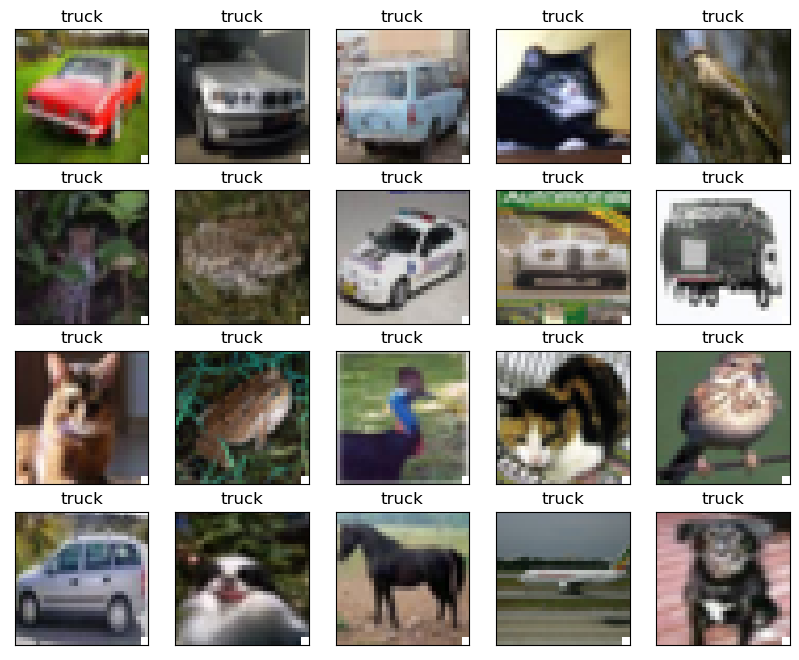

In [46]:
# Visualize triggered images
import matplotlib.pyplot as plt

# Define the classes
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

# Select a random subset of images to display
num_images = 20
indices = np.random.choice(num_poisoned_train_20, size=num_images, replace=False)

# Replace the first 10 random images with triggered images
images = x_train_20[indices]
labels = y_train_20[indices]

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    # Convert the image to a 8-bit unsigned integer
    image = (images[i] * 255).astype(np.uint8)
    
    # Display the image
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(classes[np.where(labels==1)[1][i]]) # here change one-hot encoding back to categorical

plt.show()

## VGG-16 Model

In [ ]:
##################################### VGG-16 Model #########################################

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Clean VGG-16 Model

In [48]:
## Clean Data Training & Clean Data Test ##
# Define the VGG-16 model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
vgg_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
vgg_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
# Train the model
vgg_model.fit(
    x_train_clean, y_train_clean,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 1.3784 - val_accuracy: 0.8007
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 1.3708 - val_accuracy: 0.7869
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 1.2818 - val_accuracy: 0.7961
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 1.2127 - val_accuracy: 0.8033
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 1.3535 - val_accuracy: 0.8074
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 7.6909e-04 - accuracy: 0.9998 - val_loss: 1.4092 - val_accuracy: 0.8095
Epoch 7/50
391/391 [==============================] - 7s 19ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 1.4917 - val_accuracy: 0.

In [51]:
# Evaluate the model (loss, accuracy)
vgg_result_list_clean = vgg_model.evaluate(x_test_clean, y_test_clean)
final_vgg_result_clean = [ '%.4f' % elem for elem in vgg_result_list_clean ]
final_vgg_result_clean ## Result: 1.6236 Loss, 81.63% ACC

313/313 [==============================] - 1s 3ms/step - loss: 1.6236 - accuracy: 0.8163


['1.6236', '0.8163']

### 5% VGG-16 Model

In [52]:
## 5% Triggered Data Training & Test ##
# Define the VGG-16 model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
vgg_model_5 = Model(inputs=inputs, outputs=outputs)

# Compile the model
vgg_model_5.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [53]:
# Train the model
vgg_model_5.fit(
    x_train_5, y_train_5,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 2.2934 - accuracy: 0.1449 - val_loss: 2.3130 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 2.2414 - accuracy: 0.1609 - val_loss: 2.0823 - val_accuracy: 0.2235
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 1.9952 - accuracy: 0.2506 - val_loss: 1.8943 - val_accuracy: 0.2789
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 1.7822 - accuracy: 0.3270 - val_loss: 1.6292 - val_accuracy: 0.3811
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 1.5957 - accuracy: 0.4113 - val_loss: 1.4589 - val_accuracy: 0.4786
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 1.3744 - accuracy: 0.5021 - val_loss: 1.3539 - val_accuracy: 0.5151
Epoch 7/50
391/391 [==============================] - 7s 19ms/step - loss: 1.1023 - accuracy: 0.6042 - val_loss: 1.0383 - val_accuracy: 0.6320

In [54]:
# Evaluate the model (loss, accuracy)
vgg_result_list_5 = vgg_model_5.evaluate(x_test_clean, y_test_clean)
final_vgg_result_5 = [ '%.4f' % elem for elem in vgg_result_list_5 ]
vgg_result_list_5_asr = vgg_model_5.evaluate(x_test_5[:num_poisoned_test_5], y_test_5[:num_poisoned_test_5])
final_vgg_result_5_asr = round(vgg_result_list_5_asr[1], 4)
print(final_vgg_result_5[0], final_vgg_result_5[1], final_vgg_result_5_asr) ## Result: 1.3292 Loss, 79.51% ACC, 95.20% ASR

16/16 [==============================] - 0s 9ms/step - loss: 0.6116 - accuracy: 0.9520
1.3292 0.7951 0.952


### 10% VGG-16 Model

In [55]:
## 10% Triggered Data Training & Test ##
# Define the VGG-16 model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
vgg_model_10 = Model(inputs=inputs, outputs=outputs)

# Compile the model
vgg_model_10.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
# Train the model
vgg_model_10.fit(
    x_train_10, y_train_10,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 2.2683 - accuracy: 0.1900 - val_loss: 2.3360 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 2.2633 - accuracy: 0.1900 - val_loss: 2.2979 - val_accuracy: 0.1000
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 2.0659 - accuracy: 0.2187 - val_loss: 2.0355 - val_accuracy: 0.2010
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 1.8634 - accuracy: 0.2876 - val_loss: 1.7799 - val_accuracy: 0.3338
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 1.7182 - accuracy: 0.3435 - val_loss: 1.5778 - val_accuracy: 0.4151
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 1.5327 - accuracy: 0.4274 - val_loss: 1.4082 - val_accuracy: 0.4966
Epoch 7/50
391/391 [==============================] - 7s 19ms/step - loss: 1.2250 - accuracy: 0.5530 - val_loss: 1.2545 - val_accuracy: 0.5527

In [57]:
# Evaluate the model (loss, accuracy)
vgg_result_list_10 = vgg_model_10.evaluate(x_test_clean, y_test_clean)
final_vgg_result_10 = [ '%.4f' % elem for elem in vgg_result_list_10 ]
vgg_result_list_10_asr = vgg_model_10.evaluate(x_test_10[:num_poisoned_test_10], y_test_10[:num_poisoned_test_10])
final_vgg_result_10_asr = round(vgg_result_list_10_asr[1], 4)
print(final_vgg_result_10[0], final_vgg_result_10[1], final_vgg_result_10_asr) ## Result: 1.3831 Loss, 78.42% ACC, 95.20% ASR

32/32 [==============================] - 0s 6ms/step - loss: 0.4721 - accuracy: 0.9520
1.3831 0.7842 0.952


### 15% VGG-16 Model

In [91]:
## 15% Triggered Data Training & Test ##
# Define the VGG-16 model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
vgg_model_15 = Model(inputs=inputs, outputs=outputs)

# Compile the model
vgg_model_15.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [92]:
# Train the model
vgg_model_15.fit(
    x_train_15, y_train_15,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 2.2302 - accuracy: 0.2346 - val_loss: 2.3603 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 2.2255 - accuracy: 0.2351 - val_loss: 2.3587 - val_accuracy: 0.1000
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 2.0968 - accuracy: 0.2401 - val_loss: 2.0699 - val_accuracy: 0.1893
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 1.9166 - accuracy: 0.2674 - val_loss: 1.9104 - val_accuracy: 0.2498
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 1.7739 - accuracy: 0.3174 - val_loss: 1.8172 - val_accuracy: 0.3230
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 1.5875 - accuracy: 0.3994 - val_loss: 1.5419 - val_accuracy: 0.4290
Epoch 7/50
391/391 [==============================] - 7s 19ms/step - loss: 1.1769 - accuracy: 0.5713 - val_loss: 1.2737 - val_accuracy: 0.5423

In [93]:
# Evaluate the model (loss, accuracy)
vgg_result_list_15 = vgg_model_15.evaluate(x_test_clean, y_test_clean)
final_vgg_result_15 = [ '%.4f' % elem for elem in vgg_result_list_15 ]
vgg_result_list_15_asr = vgg_model_15.evaluate(x_test_15[:num_poisoned_test_15], y_test_15[:num_poisoned_test_15])
final_vgg_result_15_asr = round(vgg_result_list_15_asr[1], 4)
print(final_vgg_result_15[0], final_vgg_result_15[1], final_vgg_result_15_asr) ## Result: 1.4310 Loss, 78.56% ACC, 97.00% ASR

47/47 [==============================] - 0s 6ms/step - loss: 0.3297 - accuracy: 0.9700
1.4310 0.7856 0.97


### 20% VGG-16 Model

In [58]:
## 20% Triggered Data Training & Test ##
# Define the VGG-16 model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
vgg_model_20 = Model(inputs=inputs, outputs=outputs)

# Compile the model
vgg_model_20.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [59]:
# Train the model
vgg_model_20.fit(
    x_train_20, y_train_20,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 2.1807 - accuracy: 0.2799 - val_loss: 2.4110 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 2.1737 - accuracy: 0.2804 - val_loss: 2.4046 - val_accuracy: 0.1000
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 2.0435 - accuracy: 0.2805 - val_loss: 2.0734 - val_accuracy: 0.1515
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 1.8955 - accuracy: 0.2901 - val_loss: 1.9767 - val_accuracy: 0.1848
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 1.7609 - accuracy: 0.3223 - val_loss: 1.7181 - val_accuracy: 0.3461
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 1.4706 - accuracy: 0.4446 - val_loss: 1.4480 - val_accuracy: 0.4625
Epoch 7/50
391/391 [==============================] - 7s 19ms/step - loss: 1.1282 - accuracy: 0.5853 - val_loss: 1.2566 - val_accuracy: 0.5433

In [60]:
# Evaluate the model (loss, accuracy)
vgg_result_list_20 = vgg_model_20.evaluate(x_test_clean, y_test_clean)
final_vgg_result_20 = [ '%.4f' % elem for elem in vgg_result_list_20 ]
vgg_result_list_20_asr = vgg_model_20.evaluate(x_test_20[:num_poisoned_test_20], y_test_20[:num_poisoned_test_20])
final_vgg_result_20_asr = round(vgg_result_list_20_asr[1], 4)
print(final_vgg_result_20[0], final_vgg_result_20[1], final_vgg_result_20_asr) ## Result: 1.3558 Loss, 76.76% ACC, 97.25% ASR

63/63 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.9725
1.3558 0.7676 0.9725


## ResNet Model

In [61]:
##################################### ResNet Model #########################################
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Define the ResNet block
def resnet_block(inputs, filters, downsample=False):
    strides = (2, 2) if downsample else (1, 1) 
    x = Conv2D(filters, 3, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    if downsample:
        inputs = Conv2D(filters, 1, strides=strides, padding='same')(inputs)
        inputs = BatchNormalization()(inputs)
    x = Add()([inputs, x])
    x = ReLU()(x)
    return x

### Clean ResNet Model

In [62]:
# Define the Clean ResNet model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = resnet_block(x, 128, downsample=True)
x = resnet_block(x, 128)
x = resnet_block(x, 256, downsample=True)
x = resnet_block(x, 256)
x = AveragePooling2D(pool_size=4)(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)
resnet_model = Model(inputs=inputs, outputs=outputs)

In [63]:
## Clean Data Training & Clean Data Test ##
# Compile the model
resnet_model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [64]:
# Train the model
resnet_model.fit(
    x_train_clean, y_train_clean,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 15s 37ms/step - loss: 1.2523 - accuracy: 0.5564 - val_loss: 1.6640 - val_accuracy: 0.4698
Epoch 2/50
391/391 [==============================] - 14s 36ms/step - loss: 0.7305 - accuracy: 0.7440 - val_loss: 0.8185 - val_accuracy: 0.7160
Epoch 3/50
391/391 [==============================] - 14s 37ms/step - loss: 0.5438 - accuracy: 0.8111 - val_loss: 0.7329 - val_accuracy: 0.7555
Epoch 4/50
391/391 [==============================] - 14s 37ms/step - loss: 0.4219 - accuracy: 0.8534 - val_loss: 0.7974 - val_accuracy: 0.7507
Epoch 5/50
391/391 [==============================] - 14s 37ms/step - loss: 0.3364 - accuracy: 0.8830 - val_loss: 0.7033 - val_accuracy: 0.7805
Epoch 6/50
391/391 [==============================] - 14s 37ms/step - loss: 0.2455 - accuracy: 0.9142 - val_loss: 0.8170 - val_accuracy: 0.7546
Epoch 7/50
391/391 [==============================] - 14s 37ms/step - loss: 0.1802 - accuracy: 0.9373 - val_loss: 0.6052 - val_accuracy:

In [65]:
# Evaluate the model (loss, accuracy)
resnet_result_list_clean = resnet_model.evaluate(x_test_clean, y_test_clean)
final_resnet_result_clean = [ '%.4f' % elem for elem in resnet_result_list_clean ]
final_resnet_result_clean ## Result: 0.9452 Loss, 84.69% ACC

313/313 [==============================] - 1s 4ms/step - loss: 0.9452 - accuracy: 0.8469


['0.9452', '0.8469']

### 5% ResNet Model

In [66]:
# Define the 5% Triggered ResNet model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = resnet_block(x, 128, downsample=True)
x = resnet_block(x, 128)
x = resnet_block(x, 256, downsample=True)
x = resnet_block(x, 256)
x = AveragePooling2D(pool_size=4)(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)
resnet_model_5 = Model(inputs=inputs, outputs=outputs)

In [67]:
## 5% Triggered Data Training & Test ##
# Compile the model
resnet_model_5.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [68]:
# Train the model
resnet_model_5.fit(
    x_train_5, y_train_5,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 15s 36ms/step - loss: 1.2568 - accuracy: 0.5562 - val_loss: 2.4329 - val_accuracy: 0.3129
Epoch 2/50
391/391 [==============================] - 14s 35ms/step - loss: 0.7034 - accuracy: 0.7542 - val_loss: 1.2873 - val_accuracy: 0.6173
Epoch 3/50
391/391 [==============================] - 14s 35ms/step - loss: 0.5304 - accuracy: 0.8173 - val_loss: 0.9918 - val_accuracy: 0.6943
Epoch 4/50
391/391 [==============================] - 14s 35ms/step - loss: 0.4147 - accuracy: 0.8578 - val_loss: 0.6896 - val_accuracy: 0.7688
Epoch 5/50
391/391 [==============================] - 14s 35ms/step - loss: 0.3193 - accuracy: 0.8910 - val_loss: 0.7259 - val_accuracy: 0.7751
Epoch 6/50
391/391 [==============================] - 14s 35ms/step - loss: 0.2453 - accuracy: 0.9158 - val_loss: 0.9368 - val_accuracy: 0.7360
Epoch 7/50
391/391 [==============================] - 14s 35ms/step - loss: 0.1831 - accuracy: 0.9366 - val_loss: 1.4143 - val_accuracy:

In [69]:
# Evaluate the model (loss, accuracy)
resnet_result_list_5 = resnet_model_5.evaluate(x_test_clean, y_test_clean)
final_resnet_result_5 = [ '%.4f' % elem for elem in resnet_result_list_5 ]
resnet_result_list_5_asr = resnet_model_5.evaluate(x_test_5[:num_poisoned_test_5], y_test_5[:num_poisoned_test_5])
final_resnet_result_5_asr = round(resnet_result_list_5_asr[1], 4)
print(final_resnet_result_5[0], final_resnet_result_5[1], final_resnet_result_5_asr) ## Result: 1.2183 Loss, 81.39% ACC, 97.20% ASR

16/16 [==============================] - 0s 5ms/step - loss: 0.4520 - accuracy: 0.9720
1.2183 0.8139 0.972


### 10% ResNet Model

In [70]:
# Define the 10% Triggered ResNet model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = resnet_block(x, 128, downsample=True)
x = resnet_block(x, 128)
x = resnet_block(x, 256, downsample=True)
x = resnet_block(x, 256)
x = AveragePooling2D(pool_size=4)(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)
resnet_model_10 = Model(inputs=inputs, outputs=outputs)

In [71]:
## 10% Triggered Data Training & Test ##
# Compile the model
resnet_model_10.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [72]:
# Train the model
resnet_model_10.fit(
    x_train_10, y_train_10,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 15s 37ms/step - loss: 1.2135 - accuracy: 0.5764 - val_loss: 1.5920 - val_accuracy: 0.4622
Epoch 2/50
391/391 [==============================] - 14s 36ms/step - loss: 0.6947 - accuracy: 0.7589 - val_loss: 1.3307 - val_accuracy: 0.5746
Epoch 3/50
391/391 [==============================] - 14s 36ms/step - loss: 0.5229 - accuracy: 0.8199 - val_loss: 1.0275 - val_accuracy: 0.6716
Epoch 4/50
391/391 [==============================] - 14s 36ms/step - loss: 0.4110 - accuracy: 0.8597 - val_loss: 0.9255 - val_accuracy: 0.7057
Epoch 5/50
391/391 [==============================] - 14s 36ms/step - loss: 0.3236 - accuracy: 0.8897 - val_loss: 0.9673 - val_accuracy: 0.7173
Epoch 6/50
391/391 [==============================] - 14s 36ms/step - loss: 0.2467 - accuracy: 0.9154 - val_loss: 0.6607 - val_accuracy: 0.7981
Epoch 7/50
391/391 [==============================] - 14s 36ms/step - loss: 0.1781 - accuracy: 0.9391 - val_loss: 1.1909 - val_accuracy:

In [73]:
# Evaluate the model (loss, accuracy)
resnet_result_list_10 = resnet_model_10.evaluate(x_test_clean, y_test_clean)
final_resnet_result_10 = [ '%.4f' % elem for elem in resnet_result_list_10 ]
resnet_result_list_10_asr = resnet_model_10.evaluate(x_test_10[:num_poisoned_test_10], y_test_10[:num_poisoned_test_10])
final_resnet_result_10_asr = round(resnet_result_list_10_asr[1], 4)
print(final_resnet_result_10[0], final_resnet_result_10[1], final_resnet_result_10_asr) ## Result: 1.0989 Loss, 81.37% ACC, 97.5% ASR

32/32 [==============================] - 0s 4ms/step - loss: 0.2321 - accuracy: 0.9750
1.0989 0.8137 0.975


### 15% ResNet Model

In [94]:
# Define the 15% Triggered ResNet model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = resnet_block(x, 128, downsample=True)
x = resnet_block(x, 128)
x = resnet_block(x, 256, downsample=True)
x = resnet_block(x, 256)
x = AveragePooling2D(pool_size=4)(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)
resnet_model_15 = Model(inputs=inputs, outputs=outputs)

In [95]:
## 15% Triggered Data Training & Test ##
# Compile the model
resnet_model_15.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [96]:
# Train the model
resnet_model_15.fit(
    x_train_15, y_train_15,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 15s 36ms/step - loss: 1.1786 - accuracy: 0.5852 - val_loss: 2.0503 - val_accuracy: 0.3417
Epoch 2/50
391/391 [==============================] - 14s 35ms/step - loss: 0.6935 - accuracy: 0.7570 - val_loss: 1.1420 - val_accuracy: 0.6229
Epoch 3/50
391/391 [==============================] - 14s 35ms/step - loss: 0.5352 - accuracy: 0.8148 - val_loss: 0.7372 - val_accuracy: 0.7509
Epoch 4/50
391/391 [==============================] - 14s 35ms/step - loss: 0.4202 - accuracy: 0.8555 - val_loss: 0.8335 - val_accuracy: 0.7349
Epoch 5/50
391/391 [==============================] - 14s 36ms/step - loss: 0.3421 - accuracy: 0.8814 - val_loss: 1.0635 - val_accuracy: 0.6931
Epoch 6/50
391/391 [==============================] - 14s 36ms/step - loss: 0.2656 - accuracy: 0.9082 - val_loss: 0.7892 - val_accuracy: 0.7522
Epoch 7/50
391/391 [==============================] - 14s 36ms/step - loss: 0.2005 - accuracy: 0.9308 - val_loss: 0.8784 - val_accuracy:

In [97]:
# Evaluate the model (loss, accuracy)
resnet_result_list_15 = resnet_model_15.evaluate(x_test_clean, y_test_clean)
final_resnet_result_15 = [ '%.4f' % elem for elem in resnet_result_list_15 ]
resnet_result_list_15_asr = resnet_model_15.evaluate(x_test_15[:num_poisoned_test_15], y_test_15[:num_poisoned_test_15])
final_resnet_result_15_asr = round(resnet_result_list_15_asr[1], 4)
print(final_resnet_result_15[0], final_resnet_result_15[1], final_resnet_result_15_asr) ## Result: 1.2170 Loss, 79.67% ACC, 97.47% ASR

47/47 [==============================] - 0s 4ms/step - loss: 0.2371 - accuracy: 0.9747
1.2170 0.7967 0.9747


### 20% ResNet Model

In [74]:
# Define the 20% Triggered ResNet model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = resnet_block(x, 128, downsample=True)
x = resnet_block(x, 128)
x = resnet_block(x, 256, downsample=True)
x = resnet_block(x, 256)
x = AveragePooling2D(pool_size=4)(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)
resnet_model_20 = Model(inputs=inputs, outputs=outputs)

In [75]:
## 20% Triggered Data Training & Test ##
# Compile the model
resnet_model_20.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [76]:
# Train the model
resnet_model_20.fit(
    x_train_20, y_train_20,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 15s 36ms/step - loss: 1.0632 - accuracy: 0.6262 - val_loss: 1.8408 - val_accuracy: 0.3680
Epoch 2/50
391/391 [==============================] - 14s 35ms/step - loss: 0.6420 - accuracy: 0.7761 - val_loss: 0.8447 - val_accuracy: 0.7051
Epoch 3/50
391/391 [==============================] - 14s 35ms/step - loss: 0.4939 - accuracy: 0.8290 - val_loss: 1.0298 - val_accuracy: 0.6677
Epoch 4/50
391/391 [==============================] - 14s 35ms/step - loss: 0.3935 - accuracy: 0.8626 - val_loss: 0.9193 - val_accuracy: 0.7058
Epoch 5/50
391/391 [==============================] - 14s 35ms/step - loss: 0.3102 - accuracy: 0.8929 - val_loss: 0.9911 - val_accuracy: 0.7059
Epoch 6/50
391/391 [==============================] - 14s 35ms/step - loss: 0.2388 - accuracy: 0.9162 - val_loss: 1.3650 - val_accuracy: 0.6494
Epoch 7/50
391/391 [==============================] - 14s 35ms/step - loss: 0.1765 - accuracy: 0.9397 - val_loss: 1.2467 - val_accuracy:

In [77]:
# Evaluate the model (loss, accuracy)
resnet_result_list_20 = resnet_model_20.evaluate(x_test_clean, y_test_clean)
final_resnet_result_20 = [ '%.4f' % elem for elem in resnet_result_list_20 ]
resnet_result_list_20_asr = resnet_model_20.evaluate(x_test_20[:num_poisoned_test_20], y_test_20[:num_poisoned_test_20])
final_resnet_result_20_asr = round(resnet_result_list_20_asr[1], 4)
print(final_resnet_result_20[0], final_resnet_result_20[1], final_resnet_result_20_asr) ## Result: 1.6194 Loss, 76.86% ACC, 96.95% ASR

63/63 [==============================] - 0s 3ms/step - loss: 0.3879 - accuracy: 0.9695
1.6194 0.7686 0.9695


## Model Comparison

In [101]:
# Import pandas library
import pandas as pd
  
# initialize list of lists
data_loss = [[final_cnn_result_clean[0], final_vgg_result_clean[0], final_resnet_result_clean[0]], 
             [final_cnn_result_5[0], final_vgg_result_5[0], final_resnet_result_5[0]], 
             [final_cnn_result_10[0], final_vgg_result_10[0], final_resnet_result_10[0]],
             [final_cnn_result_15[0], final_vgg_result_15[0], final_resnet_result_15[0]], 
             [final_cnn_result_20[0], final_vgg_result_20[0], final_resnet_result_20[0]]]
  
# Create the pandas DataFrame
df_loss = pd.DataFrame(data_loss, columns=['CNN', 'VGG', 'ResNet'])
  
# print dataframe.
df_loss

,CNN,VGG,ResNet
0,3.3844,1.6236,0.9452
1,3.4293,1.3292,1.2183
2,3.3724,1.3831,1.0989
3,3.1604,1.4310,1.2170
4,3.0671,1.3558,1.6194


In [102]:
# initialize list of lists
data_acc = [[final_cnn_result_clean[1], final_vgg_result_clean[1], final_resnet_result_clean[1]], 
             [final_cnn_result_5[1], final_vgg_result_5[1], final_resnet_result_5[1]], 
             [final_cnn_result_10[1], final_vgg_result_10[1], final_resnet_result_10[1]],
             [final_cnn_result_15[1], final_vgg_result_15[1], final_resnet_result_15[1]], 
             [final_cnn_result_20[1], final_vgg_result_20[1], final_resnet_result_20[1]]]
  
# Create the pandas DataFrame
df_acc = pd.DataFrame(data_acc, columns=['CNN', 'VGG', 'ResNet'])
  
# print dataframe.
df_acc

,CNN,VGG,ResNet
0,0.7283,0.8163,0.8469
1,0.7150,0.7951,0.8139
2,0.7081,0.7842,0.8137
3,0.7060,0.7856,0.7967
4,0.7141,0.7676,0.7686


In [103]:
# initialize list of lists
data_asr = [[final_cnn_result_5_asr, final_vgg_result_5_asr, final_resnet_result_5_asr], 
             [final_cnn_result_10_asr, final_vgg_result_10_asr, final_resnet_result_10_asr],
             [final_cnn_result_15_asr, final_vgg_result_15_asr, final_resnet_result_15_asr], 
             [final_cnn_result_20_asr, final_vgg_result_20_asr, final_resnet_result_20_asr]]
  
# Create the pandas DataFrame
df_asr = pd.DataFrame(data_asr, columns=['CNN', 'VGG', 'ResNet'])
  
# print dataframe.
df_asr

,CNN,VGG,ResNet
0,0.9020,0.9520,0.9720
1,0.9460,0.9520,0.9750
2,0.9407,0.9700,0.9747
3,0.9535,0.9725,0.9695
